## Интерполяция многочленами Лагранжа и Ньютона

Вариант 18:
$$ y = \sqrt{x} + x $$

а) $X_{i} = 0, 1.7, 3.4, 5.1$
б) $X_{i} = 0, 1.7, 4.0, 5.1$

$X^{*} = 3.0$

In [107]:
import numpy as np

func = lambda x: np.sqrt(x) + x

X_a_arr = [0, 1.7, 3.4, 5.1]
X_b_arr = [0, 1.7, 4.0, 5.1]

In [4]:
y_a_arr = []
y_b_arr = []

for x_a in X_a_arr: 
    y_a_arr.append(func(x_a))
    
for x_b in X_b_arr:
    y_b_arr.append(func(x_b))
    
print("Значения функции в точках X_a: ", y_a_arr)

print("Значения функции в точках X_b: ", y_b_arr)

Значения функции в точках X_a:  [0.0, 3.0038404810405295, 5.243908891458577, 7.358317958127243]
Значения функции в точках X_b:  [0.0, 3.0038404810405295, 6.0, 7.358317958127243]


### Многочлен Лагранжа

In [108]:
def lagrange_k(x, k, xval):
    prod = 1
    for x_i in x:
        if x_i == x[k]: #этот член произведения содержит 0 в знаменателе
            continue
        else:
            prod *= (xval - x_i)/(x[k] - x_i) #формула для одного лагранжева многочлена 
    return prod
        
def lagrange(x, y, xval): #формула для итогового интерполяционного многочлена Лагранжа
    summ = 0 
    for i in range(len(x)):
        summ += y[i]*lagrange_k(x, i, xval)
    return summ 

Построим графики изначальной функции (красным цветом) и интерполяционного многочлена (синим цветом) на области определения (0, 5.1)

Интерполяция для пункта а):

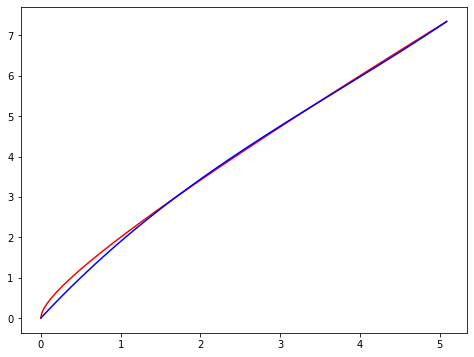

In [109]:
import matplotlib.pyplot as plt

x_full = np.arange(0, 5.1, 0.01)
y_full = [func(x_f) for x_f in x_full]
lagr_arr = [lagrange(X_a_arr, y_a_arr, x_f) for x_f in x_full]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_full, y_full, color = 'red')
ax.plot(x_full, lagr_arr, color = 'blue')

Интерполяция для пункта б):

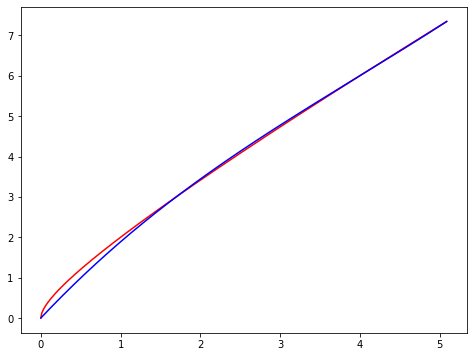

In [12]:
lagr_arr = [lagrange(X_b_arr, y_b_arr, x_f) for x_f in x_full]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_full, y_full, color = 'red')
ax.plot(x_full, lagr_arr, color = 'blue')

Оба графика похожи и для обоих среднее отличие интерполяционного многочлена от изначальной функции невелико.

Вычислим значение интерполяционного многочлена, точное значение функции и абсолютную погрешность интерполяции в точке $X_{*} = 3.0$

Случай а):

In [17]:
x_star = 3.0

true_y_star = func(x_star)
lagr_y_star = lagrange(X_a_arr, y_a_arr, x_star)

print("Точное значение функции в точке " + str(x_star) + ": y = " + str(true_y_star))
print("Значение интерполяционного многочлена в точке " + str(x_star) + ": y = " + str(lagr_y_star))
print("Абсолютная погрешность интерполяции: ", abs(true_y_star - lagr_y_star))

Точное значение функции в точке 3.0: y = 4.732050807568877
Значение интерполяционного многочлена в точке 3.0: y = 4.75177757938548
Абсолютная погрешность интерполяции:  0.019726771816602984


Случай б):

In [18]:
x_star = 3.0

true_y_star = func(x_star)
lagr_y_star = lagrange(X_b_arr, y_b_arr, x_star)

print("Точное значение функции в точке " + str(x_star) + ": y = " + str(true_y_star))
print("Значение интерполяционного многочлена в точке " + str(x_star) + ": y = " + str(lagr_y_star))
print("Абсолютная погрешность интерполяции: ", abs(true_y_star - lagr_y_star))

Точное значение функции в точке 3.0: y = 4.732050807568877
Значение интерполяционного многочлена в точке 3.0: y = 4.774713393520687
Абсолютная погрешность интерполяции:  0.042662585951810605


### Многочлен Ньютона

In [101]:
def div_diff(x_arr, y_arr):
    
    n = len(x_arr)
    if n != len(y_arr):
        print("Ошибка в несоответствии размеров массивов")
        return
    
    if n == 1:
        diff = y_arr[0]
    else:
        diff = (div_diff(x_arr[0:n-1], y_arr[0:n-1]) - div_diff(x_arr[1:n], y_arr[1:n]))/(x_arr[0] - x_arr[n-1])
    return diff

def Newton(x_arr, y_arr, x_val):
    
    n = len(x_arr)
    summ = y_arr[0]
    for i in range(n):
        prod = 1
        for j in range(i):
            prod *= (x_val-x_arr[j])
            #print(prod)
        #print(i)
        summ += (div_diff(x_arr[0:i+1], y_arr[0:i+1])) * prod
        #print(summ)
    return summ

Построим графики изначальной функции (красным цветом) и интерполяционного многочлена (синим цветом) на области определения (0, 5.1)

Интерполяция для пункта а):

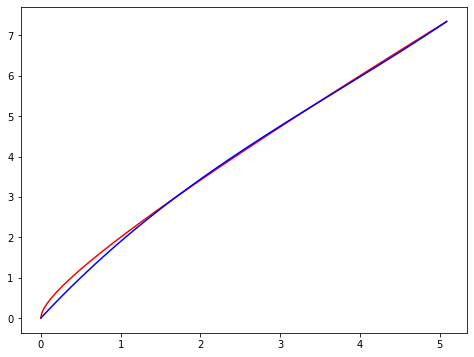

In [102]:
newton_arr = [Newton(X_a_arr, y_a_arr, x_f) for x_f in x_full]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_full, y_full, color = 'red')
ax.plot(x_full, newton_arr, color = 'blue')

Для пункта б):

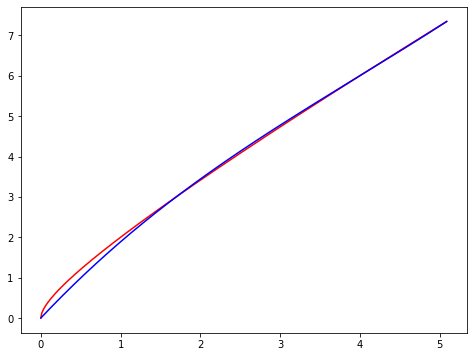

In [103]:
newton_arr2 = [Newton(X_b_arr, y_b_arr, x_f) for x_f in x_full]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_full, y_full, color = 'red')
ax.plot(x_full, newton_arr2, color = 'blue')

Вычислим значение интерполяционного многочлена, точное значение функции и абсолютную погрешность интерполяции в точке $X_{*} = 3.0$

Случай а):

In [105]:
x_star = 3.0

true_y_star = func(x_star)
newt_y_star = Newton(X_a_arr, y_a_arr, x_star)

print("Точное значение функции в точке " + str(x_star) + ": y = " + str(true_y_star))
print("Значение интерполяционного многочлена в точке " + str(x_star) + ": y = " + str(newt_y_star))
print("Абсолютная погрешность интерполяции: ", abs(true_y_star - newt_y_star))

Точное значение функции в точке 3.0: y = 4.732050807568877
Значение интерполяционного многочлена в точке 3.0: y = 4.75177757938548
Абсолютная погрешность интерполяции:  0.019726771816602984


Случай б):

In [106]:
x_star = 3.0

true_y_star = func(x_star)
newt_y_star = Newton(X_b_arr, y_b_arr, x_star)

print("Точное значение функции в точке " + str(x_star) + ": y = " + str(true_y_star))
print("Значение интерполяционного многочлена в точке " + str(x_star) + ": y = " + str(newt_y_star))
print("Абсолютная погрешность интерполяции: ", abs(true_y_star - newt_y_star))

Точное значение функции в точке 3.0: y = 4.732050807568877
Значение интерполяционного многочлена в точке 3.0: y = 4.774713393520688
Абсолютная погрешность интерполяции:  0.042662585951811494
